# <center> Facial Recognition Beyond EigenFaces </center>

<center>By Nic Wiggins</center>


<img src="./images/lda_1.png" width="70%">
<p style="text-align: right;">Image from: https://sebastianraschka.com/Articles/2014_python_lda.html</p>


[Link to the reseacher's website](http://hal.cse.msu.edu/team/vishnu-boddeti/)

---
# Abstract


I interviewed Vishnu Boddeti, a computer science faculty member. He solidified the idea that linear algebra is very important and the foundation of machine learning and computer vision. In fact, without linear algebra machine learning and computer vision would be nonexistant. Dr. Boddeti focuses his research on the intersection of Computer Vision, Biometrics and Machine Learning. Within this, he talked mainly about facial recognition, and suggested demonstration of eigenfaces - the begining of facial recognition. This report will walk through eigenfaces as well as more complex ways of doing facial recognition. 


----
# Faculty Biography

<img src="./images/vb2.jpg" width="20%">

Vishnu Boddeti is a professor for the computer science department and his research focuses on the intersection of Computer Vision, Biometrics and Machine Learning. He got his bachelor’s at Indian Institute of Technology, Madras and his PhD at Carnegie Mellon University. He has been a part of 36 publications covering topics from improving facial recognition to deep neural network improvements, which can all be found [here](http://hal.cse.msu.edu/team/vishnu-boddeti/)

Dr. Boddeti teaches multiple 400 level CSE courses, CSE 491 - Machine Learning, CSE 491 - Computer Vision, CSE 440 - Introduction to Artificial Intelligence. I had Dr. Boddeti for his Computer Vision class last spring, and I am currently in his Introduction to Artificial Intelligence class. We used a lot of linear algebra in the computer vision course and knew he would be doing research in in areas where linear algebra is a necessity. I recommend both courses to anyone who is interested in the subjects.



----
# Interview

The interview went well, I started off explaining the purpose – to demonstrate to other students the wide variety of usage of linear algebra in the real world. That I wanted to learn about what he was researching and his thoughts on what would be good to deep dive in to show other students. In addition, I asked the importance of linear algebra in his research. From there I let him talk, and he talked for the rest of the interview about different examples of the uses of linear algebra in his field. 

What went well was he explained a lot of examples of how linear algebra is used in his field and walked through fundamental ways of going about solving problems like facial recognition. Now looking back, what did not go well is I think I may have over emphasized that the goal was to show other students applications, that he was focused on examples I could explain to the class rather than diving into deep content of what he is researching when it comes to facial recognition. This was combatted by looking at his papers online.  

----
# Lessons Learned

One key take away was that everything in regards to machine learning takes data, puts it into a vector then these vectors make a matrix and is then manipulated to solve whatever problem we are trying to solve. All data is either a vector or a matrix, whether it be a picture, or even language.   

EigenFaces came out in the 1990’s when people were trying to recognize faces via images. There were two main issues with this, the first was if only direct comparison was used different lighting and different angles would make the same person be classified as different people. The other issue was that images are big and storing a lot of images becomes rather difficult. So the idea was to reduce the dimension of the data, instead of storing hundreds or thousands of large images, what if this could be reduced to only a few images. If the dimension was smaller, not only would it be cheaper to store, but also quicker to compute. The idea was every face is a linear combination of a few eigen faces. Thus, instead of storing thousands or more faces, the eigen faces and coefficients could be stored instead. To do this, each face image becomes a vector with the mean face subtracted out, and the eigenvectors for this matrix is computed and the highest eigenvalues correspond to the largest variation of the data. The new face is then projected onto the eigenvectors and the coefficients for each face are found. Then, when trying to detect a person, simply the coefficient vectors would be compared and if the distance to the known persons coefficient vector, via Euclidean or cosine distance, is within some threshold, then that person is in fact detected. Again, with this process, the number of eigen vectors could be the same as the size of the training data, but by taking the top k eigenvectors, 95% of the variation can be captured. Other facial concepts similar, in regard to compart representation. Now, a big change is instead of a linear combination, they are using nonlinear combinations to represent faces. 

From here he went onto other examples of linear algebra that he isn’t necessarily researching but thought it would be helpful to know. One of these was keywords for Google. Where you can take a keyword and map it into a vector, this vector would be in a large vector space say 500-dimensional space. Then similar words would correspond to vectors that are close to each other, and different words would correspond to vectors that would be far away from each other in the vector space. This can be similarly implemented for language translation. In this scenario, the French word for “car” and the English word for “car” would map to the same vector space. That way when translating you know the mapping function to the space and then from the space to another language. This works with sentences, paragraphs and even documents. This matrix starts to get big when knowing there are about 30,000 English words and if each has a 100-dimensional vector describing them. He then disgusted page rank, what we covered in HW 4. 

After the interview I looked into one of his papers, Coupled Marginal Fisher Analysis for Low-resolution Face Recognition, and from there I looked into Fisher Faces, since we already covered EigenFaces in HW 5. I then learned a lot while exploring FisherFaces from [3] including linear discriminant analysis and this is what is implemented in the deep dive. 

---
# Deep Dive



## Coupled Marginal Fisher Analysis for Low-resolution Face Recognition
<img src="./images/cmfa.jpg" width="50%">

Problem - Face recognition can be reliable when images are captured under controlled conditions. Difficulties may arise in unconstrained environments where quality images are not easily collected. Photographs of subjects without their active participation or knowledge, such as in surveillance videos or when the subject is at a longer distance from the camera results in much lower resolution images than those captured in a controlled setting. 

This work introduces Coupled Marginal Fisher Analysis (CMFA),a new algorithm that learns projections that map high resolution (HR) images and low resolution (LR) images to a common subspace. We find projections by extending the principles of Marginal Fisher Analysis (MFA), an effective linear projection method for images of the same resolution. The formulation is closest to Simultaneous Discriminant Analysis (SDA), but does not make the same assumptions about how the data is distributed in the subspace. While SDA is optimal for Gaussian distributions, CMFA learns projections based on the local neighborhoods of data samples, and makes no assumptions about the global data distribution in the subspace. [2]

<img src="./images/cmfa1.png" width="60%">
<img src="./images/cmfa2.png" width="60%">
<img src="./images/cmfa3.png" width="60%">
<img src="./images/cmfa4.png" width="60%">
[2]

### Basis of their research was off Marginal Fisher Analysis which builds off the idea of FisherFaces which builds off the idea of EigenFaces which we will explore now. 

## EigenFaces

N sample images $$ \{x_1, x_2, ..., x_N\} $$
C classes $$ \{X_1, X_2, ..., X_c\}  $$
$$ y_k = W^\top x_k , k = 1,2,...N$$
Scatter matrix $ S_T $
$$S_T =\sum_{k=1}^N (x_k - \mu)(x_k - \mu)^\top$$
Where $ \mu $ is the mean image

Apply linear transfromation such that $$  \{y_1, y_2, ... y_N\} = W^\top S_TW$$
In PCA $ W_{opt} $ is chosen to maximize the determinant of the total scatter matrix of the projected samples

$$ W_{opt} = arg \max_W \mid W^\top S_TW \mid = [ w_1, w_2, ... , w_m]$$
Where $ \{ w_i \mid i = 1,2, ..., m \} $ is the set of n-dimensional eigenvectors of $ S_T $ corresponding to the m largest eigenvalues. These are our eigen faces

A drawback of this approach is that the scatter being maximized is due not only to the between-class scatter that is useful for classification, but also to the within-class scatter that, for classification purposes, is unwanted information. Thus if PCA is presented with images of faces under varying illumination, the projection matrix $ W_{opt} $ will contain Eigenfaces which retain, in the projected feature space, the variation due lighting. [3]

## FIsherFaces
Utilize the information we know about the classes

In between class scatter $$ S_b = \sum_{i=1}^{c} N_i(\mu_i - \mu)(\mu_i - \mu)^\top $$
Within class scatter $$ S_w = \sum_{i=1}^{c} \sum_{x_k \in X_i} (x_k - \mu_i)(x_k - \mu_i)^T $$
$$ W_{opt} = arg \max_W \frac{\mid W^\top S_BW \mid}{\mid W^\top S_wW \mid} = [ w_1, w_2, ... , w_m]$$
Where $ \{ w_i \mid i = 1,2, ..., m \} $ is the set of generalized eigenvectors of $S_b$ and $S_w$ corresponding to the m largest generalized eigenvalues $ \{ \lambda_i \mid i = 1,2, ..., m \} $

$$ S_b w_i = \lambda_i S_w w_i ,  i = 1,2,..., m$$

Note that there are at most c - 1 nonzero generalized eigenvalues, and so an upper bound on m is c - 1, where c is the number of classes.

Problem arrises from the within class $ S_w $ is always singular. This is because the rank of $ S_w$ is at most N-c, and learning set N is usually smaller than the number of pixels in the images, n. 

New idea : Project the image set to a lower dimension space so the new $ S_w$ is nonsingular. This is achieved by using PCA to reduce the dimension of the feature space to N - c, and then applying the standard Fisher’s Linear Discriminant (FLD or LDA) to reduce the dimension to c - 1. Here, $W_{opt}$ is our FisherFaces

$$ W_{opt}^\top = W_{fld}^\top W_{pca}^\top$$
$$ W_{pca} = arg \max_W \mid W^\top S_TW \mid$$
$$ W_{fld} = arg \max_W \frac{\mid W^\top W_{pca}^\top S_B W_{pca}W \mid}{\mid W^\top W_{pca}^\top S_w W_{pca} W \mid}$$

$W_{pca}$ performed over n x (N-c) and $W_{fld}$ over (N-c) x m , throwing away only the smallest c-1 principle compoents.  [3]

Here are results when implementing FisherFaces from [3]:

Below demonstrates the better performance in different lighting scenarios 
<img src="./images/p2_lighting.png" width="50%">
<img src="./images/p2_lighting2.png" width="50%">
<img src="./images/p2_rec.png" width="50%">
Below we see lower error with smaller number of components.
<img src="./images/p2_num.png" width="50%">


## Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_lfw_people, load_digits
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

from sklearn import cluster
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

sk_data = fetch_lfw_people(min_faces_per_person=50, resize=0.4)

images = sk_data.images
feature_vectors = sk_data.data
class_labels = sk_data.target
categories = sk_data.target_names
n_samples, n_features = feature_vectors.shape
N, h, w = sk_data.images.shape
n_classes = len(categories)

X_train, X_test, y_train, y_test = train_test_split(feature_vectors, class_labels, test_size=0.25)


## Helpful Functions

In [2]:
def myPCA(X,n=0):
    
    if n == 0:
        n=X.shape[0]
        
    # n = n-dim of image
    # N = Number of images
    # From sklearn comes in Nxn -> need it to be n x N

        
    X1 = X.T
    Xmean = X1.mean(axis = 1).reshape(-1,1)
    X2 = X1 - Xmean
    
    C = np.matmul(X2,X2.T)
    vals, vecs = np.linalg.eig(C)
    #vecs, vals, variances = np.linalg.svd(X2, full_matrices=False)
    #vals = np.power(vals,2) / X2.shape[1]
    
    idx = vals.argsort()[::-1]   
    vals = vals[idx]
    vecs = vecs[:,idx]
        
    vals = vals[:n].copy()
    vecs = vecs[:,:n].copy()
    
    Xb = np.matmul(vecs.T,X2) #X in terms of new basis
    Xb = np.dot(np.linalg.inv(np.diag(np.power(vals,0.5))),Xb) #Whitining
    
    return vals, vecs.T, Xb.T, Xmean


In [3]:
# c = n_classes

def myLDA(X,y,c, n =0, s=0):
    if n == 0:
        n = c-1
    
    # n = n-dim of image
    # N = Number of images
    # From sklearn comes in Nxn -> need it to be n x N
    X1 = X.T

    
    d = X1.shape[0]
    meanTotal = X1.mean(axis = 1).reshape(-1,1)

    Sw = np.zeros((d, d),  dtype=np.float32)
    Sb = np.zeros((d, d),  dtype=np.float32)
    
    for i in range(0,c):
        Xi = X1[:,np.where(y==i)[0]]
        meanClass = np.mean(Xi, axis = 1).reshape(-1,1)
        Sw = Sw + np.dot((Xi-meanClass), (Xi-meanClass).T)
        Sb = Sb + Xi.shape[1] * np.dot((meanClass - meanTotal), (meanClass - meanTotal).T)
        
    #Shrinkage
    Sw = (1-s)*Sw + s*np.identity(d)
    Sb = (1-s)*Sb + s*np.identity(d)
        
    C = np.dot(np.linalg.inv(Sw), Sb)
    vals, vecs = np.linalg.eig(C)
    
    idx = vals.argsort()[::-1]   
    vals = vals[idx]
    vecs = vecs[:,idx]
        
    vals = np.array(vals[0:n].real, dtype=np.float32, copy=True)
    vecs = np.array(vecs[:,:n].real, dtype=np.float32, copy=True)
    
    Xb = np.matmul(vecs.T,X1)  #X in terms of new basis

    
    return vals, vecs.T, Xb.T
    
    

In [4]:
def pcaTransform(X,vec,val,mean):
    # X is from sklearn -> row vectors
    Xb = np.matmul(vec,(X-mean.reshape(-1)).T) #X in terms of new basis
    Xb = np.dot(np.linalg.inv(np.diag(np.power(val,0.5))),Xb).T #Whiting
    return Xb

In [5]:
def ldaTransform(vec, Xpca):
    return np.dot(vec,Xpca.T).T

In [6]:
def plot_gallery(images, h, w, n_row=3, n_col=5, tot = 3*5):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(tot):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)))
        plt.xticks(())
        plt.yticks(())

In [7]:
X_train.shape

(1170, 1850)

In [8]:
y_train = y_train.reshape((-1,1))
y_train.shape

(1170, 1)

## FisherFaces

In [9]:
pval, pvec, pXb, pMean = myPCA(X_train, len(y_train)-n_classes)
lval, lvec, lXb = myLDA(pXb,y_train,n_classes, n = n_classes-1, s = 0.5)
ffvec = np.dot(pvec.T,np.dot(np.diag(np.power(pval,0.5)),lvec.T)).T
FF = ffvec + pMean.reshape(-1)

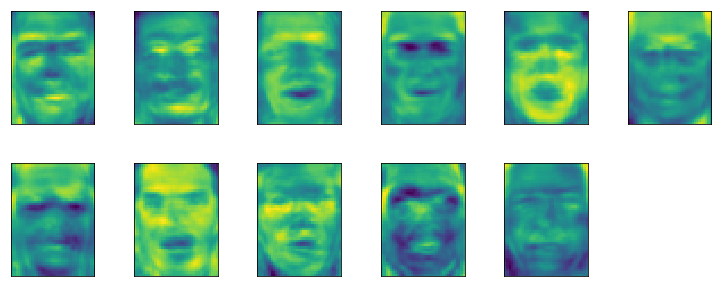

In [10]:
plot_gallery(FF, h, w, n_row=11, n_col=6,tot = n_classes-1 )

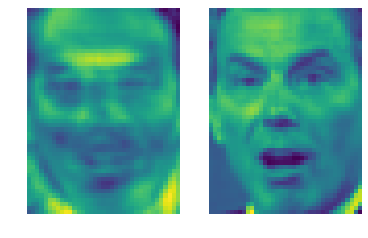

In [11]:
image_num = 49
fig = plt.figure()
ax = fig.add_subplot(121)
f = np.dot(pvec.T,np.dot(np.diag(np.power(pval,0.5)),np.dot(lXb[image_num],lvec).T)).T
ax.imshow(f.reshape((h, w)),)    
ax.axis('off');

ax = fig.add_subplot(122)
ax.imshow(X_train[image_num].reshape((h, w)))
ax.axis('off');

In [12]:
X_test_transformed = ldaTransform(lvec, pcaTransform(X_test,pvec,pval,pMean))
X_test_transformed.shape

(390, 11)

In [13]:
y_test = y_test.reshape((-1,1))
y_test.shape

(390, 1)

In [14]:
X_train_transformed = ldaTransform(lvec, pcaTransform(X_train,pvec,pval,pMean))
X_train_transformed.shape

(1170, 11)

In [15]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(lXb, y_train.reshape(-1)) 
pre = neigh.predict(X_test_transformed)
print(neigh.score(X_test_transformed, y_test))
print(classification_report(y_test, pre))

0.47692307692307695
              precision    recall  f1-score   support

           0       0.45      0.47      0.46        19
           1       0.56      0.42      0.48        59
           2       0.27      0.33      0.30        30
           3       0.69      0.60      0.64       131
           4       0.26      0.38      0.31        24
           5       0.47      0.43      0.45        21
           6       0.15      0.13      0.14        15
           7       0.42      0.45      0.43        11
           8       0.38      0.67      0.48        12
           9       0.50      0.54      0.52        13
          10       0.36      0.33      0.35        12
          11       0.40      0.44      0.42        43

   micro avg       0.48      0.48      0.48       390
   macro avg       0.41      0.43      0.42       390
weighted avg       0.50      0.48      0.48       390



## EigenFaces 

In [16]:
ef_n = 11
efval, efvec, efXb, efMean = myPCA(X_train, ef_n)
Xef_test_transformed = pcaTransform(X_test,efvec,efval,efMean)
efXb.shape

(1170, 11)

In [17]:
Xef_test_transformed.shape

(390, 11)

In [18]:
neighef = KNeighborsClassifier(n_neighbors=10)
neighef.fit(efXb, y_train.reshape(-1)) 
print(neighef.score(Xef_test_transformed, y_test.reshape(-1)))
pre = neighef.predict(Xef_test_transformed)

print(classification_report(y_test, pre))

0.4307692307692308
              precision    recall  f1-score   support

           0       0.33      0.21      0.26        19
           1       0.33      0.63      0.43        59
           2       0.32      0.27      0.29        30
           3       0.50      0.74      0.60       131
           4       0.20      0.08      0.12        24
           5       0.50      0.14      0.22        21
           6       0.00      0.00      0.00        15
           7       0.00      0.00      0.00        11
           8       0.00      0.00      0.00        12
           9       0.43      0.23      0.30        13
          10       1.00      0.67      0.80        12
          11       0.50      0.14      0.22        43

   micro avg       0.43      0.43      0.43       390
   macro avg       0.34      0.26      0.27       390
weighted avg       0.40      0.43      0.38       390



/Users/nicwiggins/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


---
# Concluding Discussion and Future Work

Through learning more about facial recognition systems I was able to implement a recognition system that extends the idea of eigenfaces. The interview overall went well, next time I would be sure to ask more about specific research he is currently doing, not just what would be good examples to show the class. Next steps include looking more into Marginal Fisher Analysis, and other techniques used like feature recognition and such. I would also like to find out why fisherfaces isn't working as optimally as it should

----

# References

[1] http://hal.cse.msu.edu/team/vishnu-boddeti/ 

[2] Coupled Marginal Fisher Analysis for
Low-resolution Face Recognition http://hal.cse.msu.edu/assets/pdfs/papers/2012-eccvw-cmfa.pdf

[3] Eigenfaces vs. Fisherfaces: Recognition
Using Class Specific Linear Projection https://cseweb.ucsd.edu/classes/wi14/cse152-a/fisherface-pami97.pdf

[4] https://www.bytefish.de/blog/fisherfaces/

[5] https://github.com/bytefish/facerec/blob/master/py/facerec/feature.py

[6] http://mccormickml.com/2014/06/03/deep-learning-tutorial-pca-and-whitening/

[7] https://en.wikipedia.org/wiki/Linear_discriminant_analysis

[8] https://scikit-learn.org/stable/modules/lda_qda.html#lda-qda
